In [49]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [1]:
df = pd.read_csv('advertising.csv')
print(df.describe())

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [8]:

x = df[["TV","radio","newspaper"]]
y = df["sales"]

model = LinearRegression()
model.fit(x,y)
a_tv,a_radio,a_newspaper = model.coef_
c = model.intercept_
print("Coefficients\nTV        : ",a_tv,"\nradio     : ",a_radio,"\nnewspaper : ",a_newspaper,"\nIntercept : ",c)

Coefficients
TV        :  0.0457646454553976 
radio     :  0.18853001691820448 
newspaper :  -0.0010374930424763285 
Intercept :  2.938889369459412


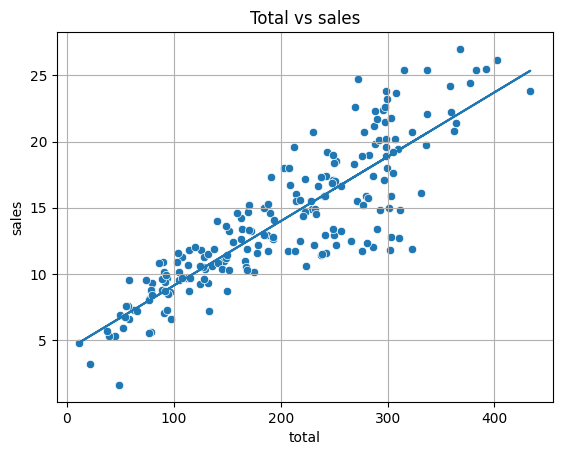

In [19]:


df["total"] = df["TV"] + df["radio"] + df["newspaper"]
x = df[["total"]]
y = df["sales"]
model.fit(x,y)
df["predicted_sales"] = model.predict(x)
a = model.coef_[0]
b = model.intercept_
sns.scatterplot(data=df,x="total",y="sales")
plt.plot(df["total"], a * df["total"] + b)
plt.title("Total vs sales")
plt.grid(True)
plt.show()

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print("Traing set - x shape : ",x_train.shape,"\nTraing set - y shape : ",y_train.shape,"\nTesting set - x shape : ",x_test.shape,"\nTesting set - y shape : ",y_test.shape)

Traing set - x shape :  (140, 1) 
Traing set - y shape :  (140,) 
Testing set - x shape :  (60, 1) 
Testing set - y shape :  (60,)


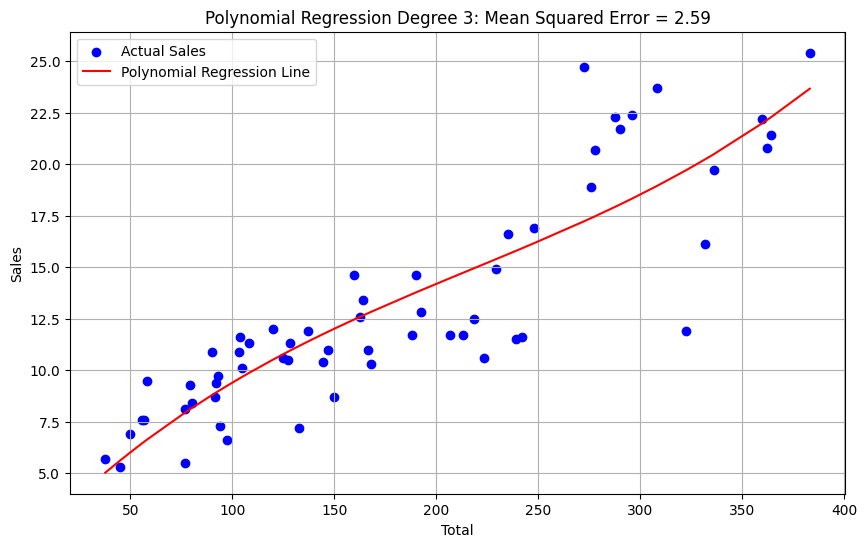

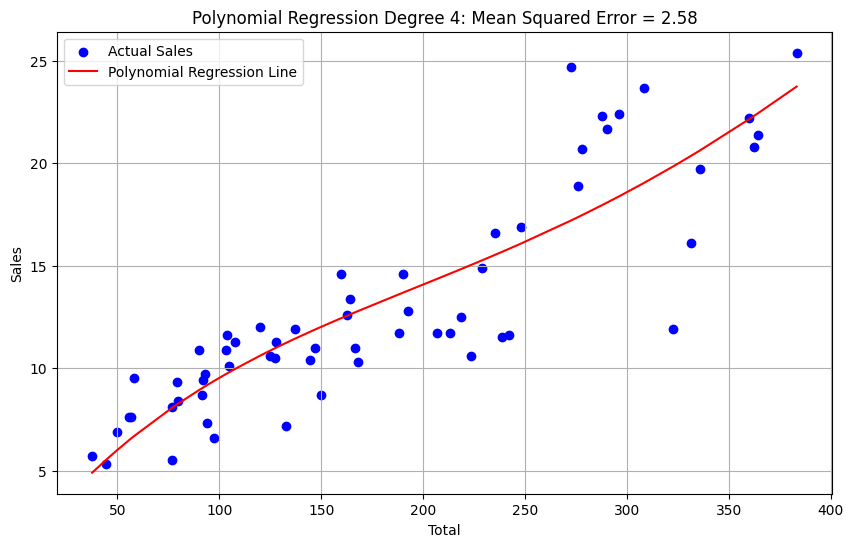

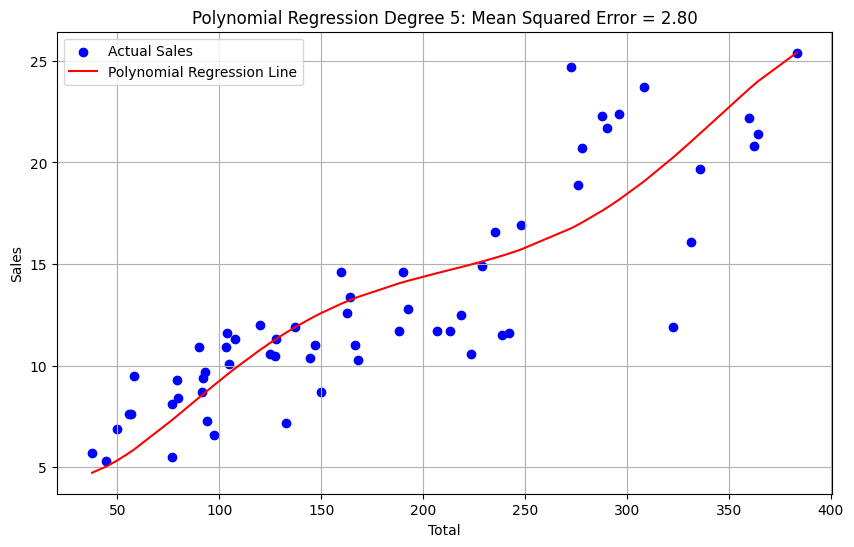

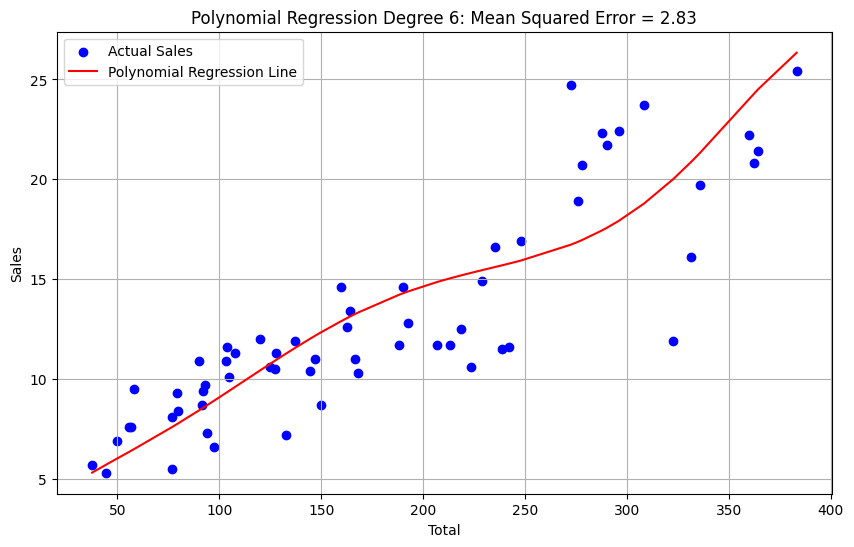

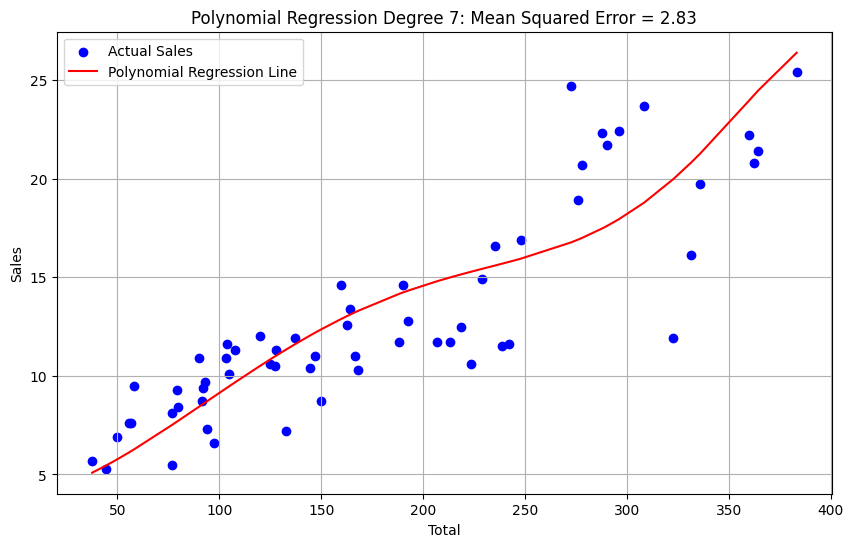

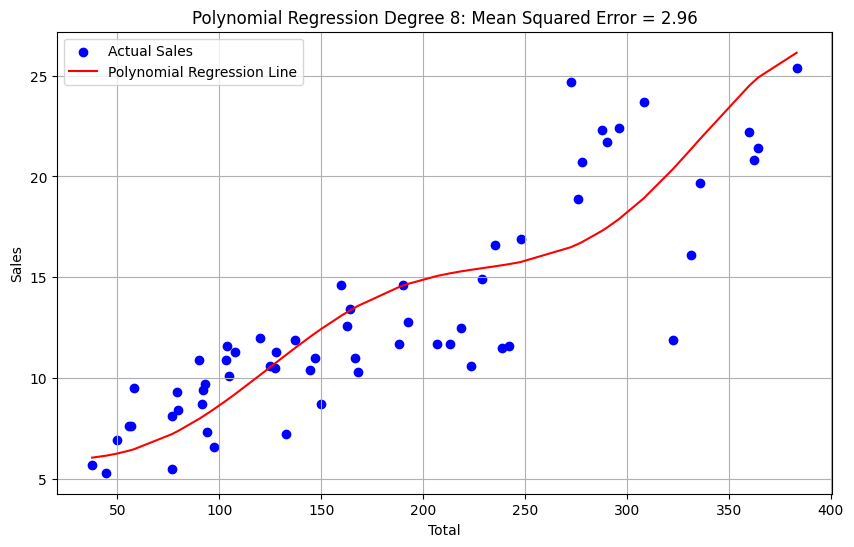

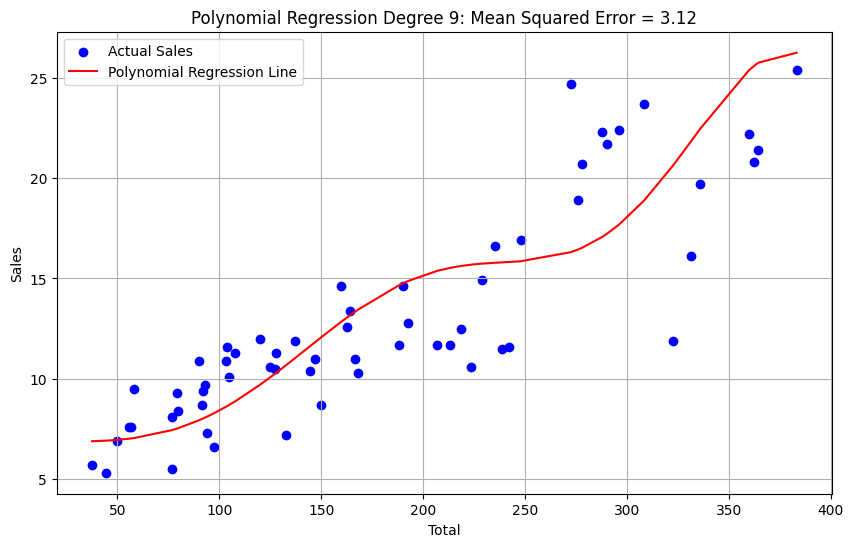

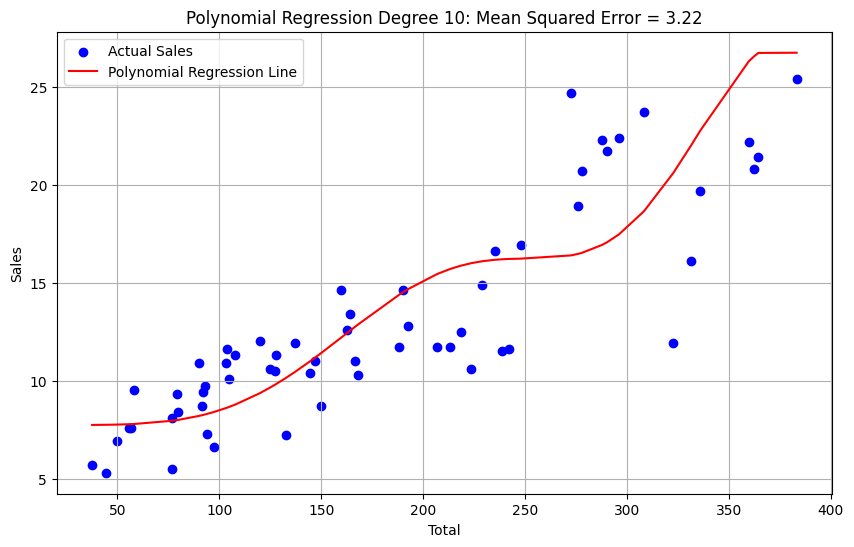

Degree 3: Mean Squared Error = 2.5882231430873537
Degree 4: Mean Squared Error = 2.58024959874925
Degree 5: Mean Squared Error = 2.802984289978165
Degree 6: Mean Squared Error = 2.8330561471932483
Degree 7: Mean Squared Error = 2.825053589973892
Degree 8: Mean Squared Error = 2.964338502717852
Degree 9: Mean Squared Error = 3.118113216308041
Degree 10: Mean Squared Error = 3.2248748516547514
Degree with minimum error :  4 
Minimum mean squared error : 
 2.58024959874925

COEFFICIENT :  [array([ 0.00000000e+00,  1.02589526e-01, -2.83818439e-04,  4.35025518e-07]), array([ 0.00000000e+00,  1.29104582e-01, -5.27971855e-04,  1.27506249e-06,
       -9.57868701e-10]), array([ 0.00000000e+00, -1.08110314e-01,  2.81018939e-03, -1.81184555e-05,
        4.83401796e-08, -4.53045934e-11]), array([ 0.00000000e+00,  1.18990906e-01, -1.61150332e-03,  1.91686800e-05,
       -1.04969687e-07,  2.57073029e-10, -2.28733699e-13]), array([ 0.00000000e+00,  6.67900869e-05,  1.01212751e-03, -7.72414533e-06,
  

In [58]:
degree_error = {}
mse_val = []
rmse_val = []
coeff = []
mae_val = []
r2_val= []

for degree in range(3,11):
    poly_feature = PolynomialFeatures(degree = degree)
    x_train_poly = poly_feature.fit_transform(x_train)
    x_test_poly = poly_feature.transform(x_test)x
    
    model = LinearRegression()
    model.fit(x_train_poly,y_train)
    
    y_pred = model.predict(x_test_poly)
    coeff.append(model.coef_)
    
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    mse_val.append(mse)
    rmse_val.append(rmse)
    
    mae = mean_absolute_error(y_test, y_pred)
    mae_val.append(mae)
    
    r2 = r2_score(y_test, y_pred)
    r2_val.append(r2)
    
    degree_error[degree] = rmse 
    plt.figure(figsize=(10, 6))
    plt.scatter(x_test, y_test, color='blue', label='Actual Sales')
    plt.plot(np.sort(x_test.values, axis=0), np.sort(y_pred, axis=0), color='red', label='Polynomial Regression Line')
    plt.title(f"Polynomial Regression Degree {degree}: Mean Squared Error = {rmse:.2f}")
    plt.xlabel('Total')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()
    
for degree, error in degree_error.items():
    print(f"Degree {degree}: Mean Squared Error = {error}")
    
min_degree = min(degree_error,key=degree_error.get)
min_error = degree_error[min_degree]

print("Degree with minimum error : ",min_degree,"\nMinimum mean squared error : \n",min_error)
print("\nCOEFFICIENT : ",coeff)
print("\nMean Squared Error (MSE)",mse_val)
print("\nRoot Mean Squared Error (RMSE)",rmse_val)
print("\nMean Absolute Error (MAE)",mae_val)
print("\nR-squared (R2)",r2_val)

In [57]:
input_data = np.array([[149, 22, 15]])
total_value = input_data.sum(axis=1)

x = df[["TV", "radio", "newspaper"]].sum(axis=1).values.reshape(-1, 1) 
y = df["sales"].values
degree = 3 
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(X_poly, y)


input_poly = poly_features.transform(total_value.reshape(-1, 1))
predicted_sales = model.predict(input_poly)

print("Predicted Sales:", predicted_sales[0])


Predicted Sales: 13.400673012385948
